In [1]:
import yfinance as yf
import pandas as pd
import csv
from tqdm import tqdm
import html5lib

In [2]:
with open('sp500.csv', newline='') as f:
    reader = csv.reader(f)
    sp500 = [val for sublist in list(reader) for val in sublist]

sp500.remove('GOOGL')
sp500.append('GOOG')
sp500[:5]

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN']

In [7]:
stocks_sectors = {}
errors = []

for stock in tqdm(sp500):
    try:
        stocks_sectors[stock] = [yf.Ticker(stock).info['sector'], yf.Ticker(stock).info['shortName']]
    except Exception as e:
        errors.append([e, stock])

100%|██████████| 505/505 [23:39<00:00,  2.81s/it]


In [17]:
stocks_NA = {}
for s in errors:
    stocks_NA[s[1]] = ['No Information', 'No Information']

In [18]:
all_stocks = {**stocks_sectors, ** stocks_NA}

In [19]:
all_stocks = sorted(all_stocks.items())

In [45]:
clean_all_stocks = []

for i in range(len(all_stocks)):
    clean_all_stocks.append([all_stocks[i][0],
                            all_stocks[i][1][0],
                            all_stocks[i][1][1]])

In [47]:
import csv
f = open('sp500_sectors.csv', 'w')

with f:
    writer = csv.writer(f)
    for row in clean_all_stocks:
        writer.writerow(row)

In [48]:
with open('sp500_sectors.csv', newline='') as f:
    reader = csv.reader(f)
    sp500_s = list(reader)

sp500_s[:5]

[['A', 'Healthcare', 'Agilent Technologies, Inc.'],
 ['AAL', 'Industrials', 'American Airlines Group, Inc.'],
 ['AAP', 'Consumer Cyclical', 'Advance Auto Parts Inc Advance '],
 ['AAPL', 'Technology', 'Apple Inc.'],
 ['ABBV', 'Healthcare', 'AbbVie Inc.']]

In [77]:
with open('sp500_sectors.csv', newline='') as f:
    reader = csv.reader(f)
    sp500_s = list(reader)

clean_sp500 = {
 'Basic Materials': [],
 'Communication Services': [],
 'Consumer Cyclical': [],
 'Consumer Defensive': [],
 'Energy': [],
 'Financial Services': [],
 'Healthcare': [],
 'Industrials': [],
 'Real Estate': [],
 'Technology': [],
 'Utilities': [],
 'No Information': []
}

for sector, value in clean_sp500.items():
    for row in sp500_s:
        if sector == row[1]:
            clean_sp500[row[1]] += [row[0], row[2]]

In [84]:
for i in range(len(clean_sp500['Utilities'])):
    if i % 2 == 0:
        print('symbol', clean_sp500['Utilities'][i])
    else:
        print('name', clean_sp500['Utilities'][i])

symbol AEE
name Ameren Corporation
symbol AEP
name American Electric Power Company
symbol AES
name The AES Corporation
symbol ATO
name Atmos Energy Corporation
symbol AWK
name American Water Works Company, I
symbol CMS
name CMS Energy Corporation
symbol CNP
name CenterPoint Energy, Inc (Holdin
symbol D
name Dominion Energy, Inc.
symbol DTE
name DTE Energy Company
symbol ED
name Consolidated Edison, Inc.
symbol EIX
name Edison International
symbol ES
name Eversource Energy (D/B/A)
symbol EXC
name Exelon Corporation
symbol LNT
name Alliant Energy Corporation
symbol NRG
name NRG Energy, Inc.
symbol SO
name Southern Company (The)
symbol SRE
name Sempra Energy


In [89]:
[{'label': clean_sp500['Utilities'][i], 'value': clean_sp500['Utilities'][i+1]} for i in range(len(clean_sp500['Utilities'])) if i % 2 ==0]

[{'label': 'AEE', 'value': 'Ameren Corporation'},
 {'label': 'AEP', 'value': 'American Electric Power Company'},
 {'label': 'AES', 'value': 'The AES Corporation'},
 {'label': 'ATO', 'value': 'Atmos Energy Corporation'},
 {'label': 'AWK', 'value': 'American Water Works Company, I'},
 {'label': 'CMS', 'value': 'CMS Energy Corporation'},
 {'label': 'CNP', 'value': 'CenterPoint Energy, Inc (Holdin'},
 {'label': 'D', 'value': 'Dominion Energy, Inc.'},
 {'label': 'DTE', 'value': 'DTE Energy Company'},
 {'label': 'ED', 'value': 'Consolidated Edison, Inc.'},
 {'label': 'EIX', 'value': 'Edison International'},
 {'label': 'ES', 'value': 'Eversource Energy (D/B/A)'},
 {'label': 'EXC', 'value': 'Exelon Corporation'},
 {'label': 'LNT', 'value': 'Alliant Energy Corporation'},
 {'label': 'NRG', 'value': 'NRG Energy, Inc.'},
 {'label': 'SO', 'value': 'Southern Company (The)'},
 {'label': 'SRE', 'value': 'Sempra Energy'}]

In [88]:
clean_sp500['Utilities'][33]

'Sempra Energy'

In [57]:
for i in clean_sp500['Utilities']:
    print(i)

AEE
Ameren Corporation
AEP
American Electric Power Company
AES
The AES Corporation
ATO
Atmos Energy Corporation
AWK
American Water Works Company, I
CMS
CMS Energy Corporation
CNP
CenterPoint Energy, Inc (Holdin
D
Dominion Energy, Inc.
DTE
DTE Energy Company
ED
Consolidated Edison, Inc.
EIX
Edison International
ES
Eversource Energy (D/B/A)
EXC
Exelon Corporation
LNT
Alliant Energy Corporation
NRG
NRG Energy, Inc.
SO
Southern Company (The)
SRE
Sempra Energy


In [5]:
selection = dict(zip(sectors, range(len(sectors))))
selection

{'Basic Materials': 0,
 'Communication Services': 1,
 'Consumer Cyclical': 2,
 'Consumer Defensive': 3,
 'Energy': 4,
 'Financial Services': 5,
 'Healthcare': 6,
 'Industrials': 7,
 'Real Estate': 8,
 'Technology': 9,
 'Utilities': 10}

In [6]:
for k in selection:
    print(k)

Basic Materials
Communication Services
Consumer Cyclical
Consumer Defensive
Energy
Financial Services
Healthcare
Industrials
Real Estate
Technology
Utilities


In [4]:
# get historical market data
hist = yf.Ticker('GOOG').history(period="2y")

In [5]:
hist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,505.000000,505.000000,505.00000,505.000000,5.050000e+02,505.0,505.0
mean,1244.595584,1258.354653,1231.91895,1245.953465,1.684050e+06,0.0,0.0
std,153.885775,155.161124,153.80795,155.154345,7.552536e+05,0.0,0.0
min,973.900000,1003.540000,970.11000,976.220000,3.475000e+05,0.0,0.0
25%,1122.000000,1132.800000,1109.02000,1120.160000,1.221900e+06,0.0,0.0
50%,1200.740000,1212.020000,1193.08000,1204.800000,1.479900e+06,0.0,0.0
75%,1355.870000,1368.140000,1344.47000,1355.120000,1.888500e+06,0.0,0.0
max,1709.710000,1733.180000,1666.33000,1728.280000,6.207000e+06,0.0,0.0


In [6]:
# get stock info
print(yf.Ticker('GOOG').info)

{'zip': '94043', 'sector': 'Communication Services', 'fullTimeEmployees': 127498, 'longBusinessSummary': 'Alphabet Inc. provides online advertising services in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It offers performance and brand advertising services. The company operates through Google and Other Bets segments. The Google segment offers products, such as Ads, Android, Chrome, Google Cloud, Google Maps, Google Play, Hardware, Search, and YouTube, as well as technical infrastructure. It also offers digital content, cloud services, hardware devices, and other miscellaneous products and services. The Other Bets segment includes businesses, including Access, Calico, CapitalG, GV, Verily, Waymo, and X, as well as Internet and television services. Alphabet Inc. was founded in 1998 and is headquartered in Mountain View, California.', 'city': 'Mountain View', 'phone': '650-253-0000', 'state': 'CA', 'country': 'United States', 'companyOf

<AxesSubplot:xlabel='Date'>

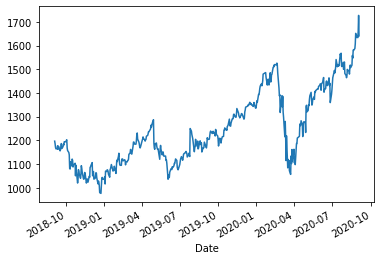

In [8]:
hist.Close.plot()

In [9]:
sp = yf.Ticker('^GSPC')
sp.info

{'previousClose': 3580.84,
 'regularMarketOpen': 3564.74,
 'twoHundredDayAverage': 3030.5415,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 3564.85,
 'navPrice': None,
 'averageDailyVolume10Day': 4096046250,
 'totalAssets': None,
 'regularMarketPreviousClose': 3580.84,
 'fiftyDayAverage': 3352.7456,
 'trailingAnnualDividendRate': None,
 'open': 3564.74,
 'toCurrency': None,
 'averageVolume10days': 4096046250,
 'expireDate': None,
 'yield': None,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 3427.41,
 'priceHint': 2,
 'currency': 'USD',
 'regularMarketVolume': 3193601820,
 'lastMarket': None,
 'maxSupply': None,
 'openInterest': None,
 'marketCap': None,
 'volumeAllCurrencies': None,
 'strikePrice': None,
 'averageVolume': 4770155384,
 'priceToSalesTrailing12Months': None,
 'dayLow': 3427.41,
 'ask': 3504.81,
 'ytdReturn

In [31]:
with open('sp500_sectors.csv', newline='') as f:
    reader = csv.reader(f)
    sp500_s = dict(reader)

In [33]:
sectors = [
 'Basic Materials',
 'Communication Services',
 'Consumer Cyclical',
 'Consumer Defensive',
 'Energy',
 'Financial Services',
 'Healthcare',
 'Industrials',
 'Real Estate',
 'Technology',
 'Utilities',
 'No Information'
]

In [39]:
clean_sp500 = {
 'Basic Materials': [],
 'Communication Services': [],
 'Consumer Cyclical': [],
 'Consumer Defensive': [],
 'Energy': [],
 'Financial Services': [],
 'Healthcare': [],
 'Industrials': [],
 'Real Estate': [],
 'Technology': [],
 'Utilities': [],
 'No Information': []
}

for sector, value in clean_sp500.items():
    for key, item in sp500_s.items():
        if sector == item:
            clean_sp500[sector] += [key]

In [40]:
clean_sp500

{'Basic Materials': ['ALB',
  'APD',
  'CE',
  'CF',
  'CTVA',
  'DOW',
  'ECL',
  'EMN',
  'IFF',
  'LIN',
  'LYB',
  'MLM',
  'MOS',
  'NEM',
  'NUE',
  'SHW',
  'VMC'],
 'Communication Services': ['ATVI',
  'CHTR',
  'DIS',
  'DISCA',
  'DISCK',
  'DISH',
  'EA',
  'FB',
  'FOX',
  'FOXA',
  'GOOG',
  'IPG',
  'NWS',
  'NWSA',
  'T',
  'TMUS',
  'TTWO',
  'TWTR'],
 'Consumer Cyclical': ['AAP',
  'AMCR',
  'AMZN',
  'AZO',
  'BBY',
  'BKNG',
  'BLL',
  'BWA',
  'CMG',
  'DHI',
  'DPZ',
  'DRI',
  'EBAY',
  'FBHS',
  'GM',
  'GPC',
  'HAS',
  'HBI',
  'HRB',
  'IP',
  'KMX',
  'KSS',
  'LB',
  'LEG',
  'LEN',
  'LOW',
  'LVS',
  'MAR',
  'MCD',
  'MGM',
  'MHK',
  'NCLH',
  'NKE',
  'ORLY',
  'PKG',
  'PVH',
  'RCL',
  'ROL',
  'ROST',
  'SBUX',
  'TIF',
  'TJX',
  'TSCO',
  'UA',
  'UAA',
  'ULTA',
  'VFC',
  'WHR',
  'WRK'],
 'Consumer Defensive': ['ADM',
  'CAG',
  'CHD',
  'CL',
  'CLX',
  'COST',
  'COTY',
  'CPB',
  'DLTR',
  'EL',
  'GIS',
  'HRL',
  'HSY',
  'K',
  'KHC',
  'K